# Milk Quality Prediction

Target

Low (Bad)

Medium (Moderate)

High (Good)

If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.

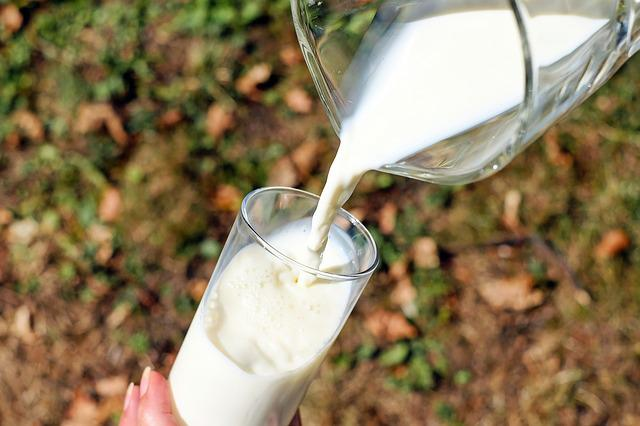

## Imports

In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
df = pd.read_csv('/Users/linjiayi/Downloads/0106報告/milknew.csv')

## Data pre-processing and EDA

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


# 名目變數 nominal variable 與數值變數 差異
https://www.ibm.com/docs/zh-tw/spss-statistics/saas?topic=charts-variable-types

### 王老師補充
X:數值變數 非nomina(有大小之分：Good Bad)
轉換0,1: 實務上還可以接受

若是名目變數 nominal variable(性別)
轉換0,1:就不適合

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.shape

(1059, 8)

In [6]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

## Preparing the data

In [7]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Grade']= label_encoder.fit_transform(df['Grade'])
  
df['Grade'].unique()

array([0, 1, 2])

In [8]:
df.head()
#high: 0
#low: 1
#medoum: 2

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [9]:
X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = df[['Grade']]

In [10]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 7)
(741, 1)
(318, 7)
(318, 1)


# Feature Selection 特徵選取
## Python機器學習實踐：隨機森林算法訓練及調參-附代碼

### 王老師說明 特徵選取-特徵變數比較多才需要selection

https://kknews.cc/tech/5v4943l.html

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) 
forest.fit(X_train, y_train)

importances = forest.feature_importances_ 
print("重要性：",importances)
#X = df[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
print()

feat_labels = df.columns[0:]
X_columns = df.columns[0:] 
indices = np.argsort(importances)[::-1] 
for f in range(X_train.shape[1]): 
    # 對於最後需要逆序排序，我認為是做了類似決策樹回溯的取值，從葉子收斂 
    # 到根，根部重要程度高於葉子。 
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

重要性： [0.39447545 0.24383443 0.0426549  0.08381532 0.08317404 0.08920115
 0.06284471]

 1) pH                             0.394475
 2) Temprature                     0.243834
 3) Turbidity                      0.089201
 4) Odor                           0.083815
 5) Fat                            0.083174
 6) Colour                         0.062845
 7) Taste                          0.042655


# 變數重要性後，重新切割train test
## 刪去最後2個最不重要的
## 保留其他5個
'pH', 'Temprature', 'Odor', 'Fat ', 'Turbidity'

In [12]:
X = df[['pH', 'Temprature', 'Odor', 'Fat ', 'Turbidity']]
y = df[['Grade']]

In [13]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
#The standard score of a sample x is calculated as:
#z = (x - u) / s
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#print(X_train)

(741, 5)
(741, 1)
(318, 5)
(318, 1)


# MODEL BUILDING

# RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# RandomForestClassifier調整最佳參數
https://ithelp.ithome.com.tw/articles/10267379

In [14]:
from sklearn.model_selection import RandomizedSearchCV

#建立參數的各自區間
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 30, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest2 = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = forest2, param_distributions=random_grid,
                              n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train,y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Applications/anaconda/anaconda3/lib/python3.9/site-packages/sklearn/model_s

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

RF_accuracy =  0.9811320754716981

[[ 72   0   4]
 [  1 113   1]
 [  0   0 127]]


Text(50.722222222222214, 0.5, 'Actual label')

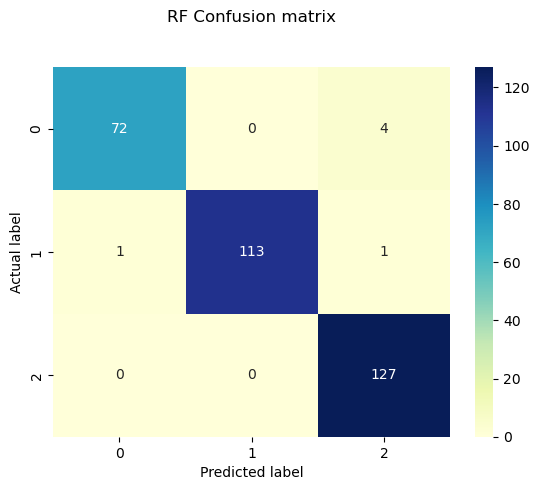

In [16]:
# training a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf_model = RandomForestClassifier(n_estimators=70,
    min_samples_split=5,min_samples_leaf=4,max_features='sqrt',
    max_depth=7,bootstrap=False).fit(X_train, y_train) #原先
rf_predictions = rf_model.predict(X_test)

# model accuracy for X_test  
rf_accuracy = rf_model.score(X_test, y_test)
print("RF_accuracy = ",rf_accuracy)
print()
  
# creating a confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print(rf_cm)

p = sns.heatmap(pd.DataFrame(rf_cm), annot=True, cmap="YlGnBu" ,fmt='g') #將矩形資料繪製為彩色編碼矩陣
plt.title('RF Confusion matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# SVM (Support vector machine) classifier 
-SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear).

當特徵向量是高維時，SVM（支持向量機）是一種高效的分類方法。在 sci-kit learn 中，我們可以指定核函數（這裡是線性的）。

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# kernel差異
![](https://miro.medium.com/max/1400/1*BImo3o1CobY8s3QCBF5qng.webp)   

### 王志軒老師補充：kernel比較常用rbf ，而非linear
https://chih-sheng-huang821.medium.com/機器學習-kernel-函數-47c94095171

# C值

C：懲罰係數，即對誤差的寬容度，C越高，說明越不能容忍出現誤差，容易過度擬合。C越小，容易欠擬合

https://zhuanlan.zhihu.com/p/107656326

[0.89937106918239, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9245283018867925, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409, 0.9088050314465409]

Max SVM test score 92.45283018867924% and k(C) = [5]


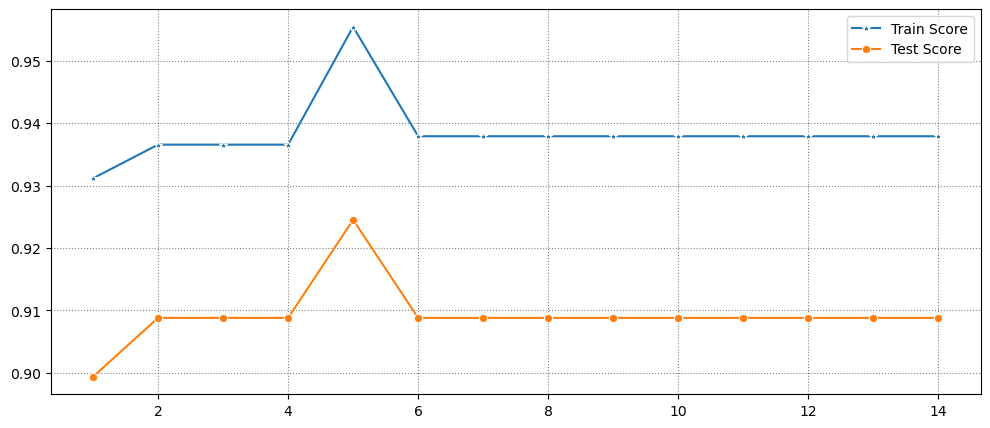

In [17]:
from sklearn.svm import SVC


svc_test_scores = []
svc_train_scores = []

#設定14個max_depth測試 
for i in range(1,15):

    svm_model_linear = SVC(kernel = 'rbf', C = i).fit(X_train, y_train)
    
    svc_train_scores.append(svm_model_linear.score(X_train,y_train))
    svc_test_scores.append(svm_model_linear.score(X_test,y_test))

plt.figure(figsize=(12,5))
plt.grid(color='black', linestyle=':', alpha=0.5)
p = sns.lineplot(range(1,15),svc_train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),svc_test_scores,marker='o',label='Test Score')

print(svc_test_scores)
print()

svm_max_test_score = max(svc_test_scores)
svm_test_scores_ind = [i for i, v in enumerate(svc_test_scores) if v == svm_max_test_score]
print('Max SVM test score {}% and k(C) = {}'.format(svm_max_test_score*100, list(map(lambda x: x+1, svm_test_scores_ind))))

Max SVM cross validation score 92.72735401949387% and k(C) = [9, 10, 11, 12]


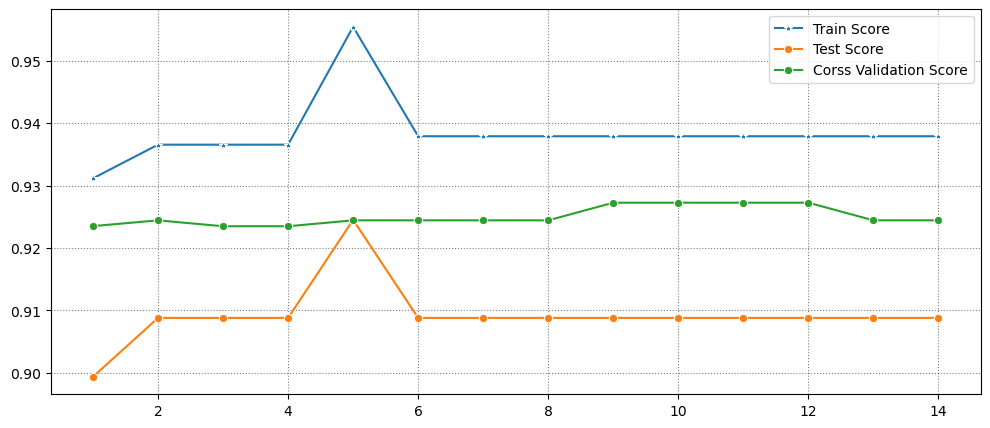

In [18]:
#k-fold cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

svc_validation_scores = []

#create a new DecisionTree model
for k in range(1,15):
    svm_model_linear_cv = SVC(kernel = 'rbf', C = k)

    #train model with cv of 3 
    svm_cv_scores = cross_val_score(svm_model_linear_cv, X, y, cv=5)
    #print each cv score (accuracy) and average them
    #print(cv_scores)
    #print("cv_scores mean:{}, k={}".format(np.mean(cv_scores),k))
    svc_validation_scores.append(np.mean(svm_cv_scores))
    #print()

svm_max_validation_score = max(svc_validation_scores)
svm_validation_scores_ind = [i for i, v in enumerate(svc_validation_scores) if v == svm_max_validation_score]
print('Max SVM cross validation score {}% and k(C) = {}'.format(svm_max_validation_score*100, list(map(lambda x: x+1, svm_validation_scores_ind))))

plt.figure(figsize=(12,5))
plt.grid(color='black', linestyle=':', alpha=0.5)
p = sns.lineplot(range(1,15),svc_train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),svc_test_scores,marker='o',label='Test Score')
p = sns.lineplot(range(1,15),svc_validation_scores,marker='o',label='Corss Validation Score')

SVM_accuracy =  0.9245283018867925

[[ 54   0  22]
 [  2 113   0]
 [  0   0 127]]


Text(50.722222222222214, 0.5, 'Actual label')

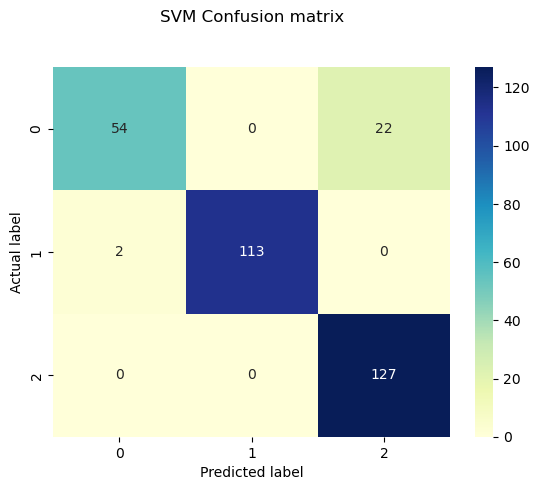

In [19]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'rbf', C = 5).fit(X_train, y_train) #原先 C = 1
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
svm_accuracy = svm_model_linear.score(X_test, y_test)
print("SVM_accuracy = ",svm_accuracy)
print()
  
# creating a confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print(svm_cm)

p = sns.heatmap(pd.DataFrame(svm_cm), annot=True, cmap="YlGnBu" ,fmt='g') #將矩形資料繪製為彩色編碼矩陣
plt.title('SVM Confusion matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# KNN (k-nearest neighbors) classifier 
– KNN or k-nearest neighbors is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbors from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier

[0.9842767295597484, 0.9811320754716981, 0.9811320754716981, 0.9937106918238994, 0.9748427672955975, 0.9748427672955975, 0.9622641509433962, 0.9622641509433962, 0.9528301886792453, 0.9528301886792453, 0.9528301886792453, 0.9528301886792453, 0.9528301886792453, 0.9528301886792453]

Max KNN test score 99.37106918238993% and k(n_neighbors) = [4]


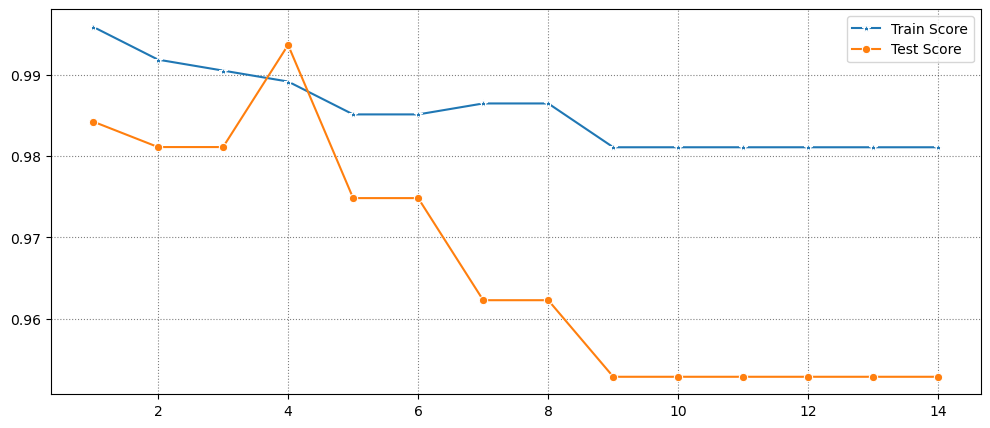

In [20]:
from sklearn.neighbors import KNeighborsClassifier


knn_test_scores = []
knn_train_scores = []

#設定14個k測試 
for i in range(1,15):

    knn = KNeighborsClassifier(i).fit(X_train,y_train)
    
    knn_train_scores.append(knn.score(X_train,y_train))
    knn_test_scores.append(knn.score(X_test,y_test))
    
print(knn_test_scores)
print()

knn_max_test_score = max(knn_test_scores)
knn_test_scores_ind = [i for i, v in enumerate(knn_test_scores) if v == knn_max_test_score]
print('Max KNN test score {}% and k(n_neighbors) = {}'.format(knn_max_test_score*100, list(map(lambda x: x+1, knn_test_scores_ind))))


plt.figure(figsize=(12,5))
plt.grid(color='black', linestyle=':', alpha=0.5)
p = sns.lineplot(range(1,15),knn_train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),knn_test_scores,marker='o',label='Test Score')

Max KNN cross validation score 99.05526245193596% and k(n_neighbors) = [2]


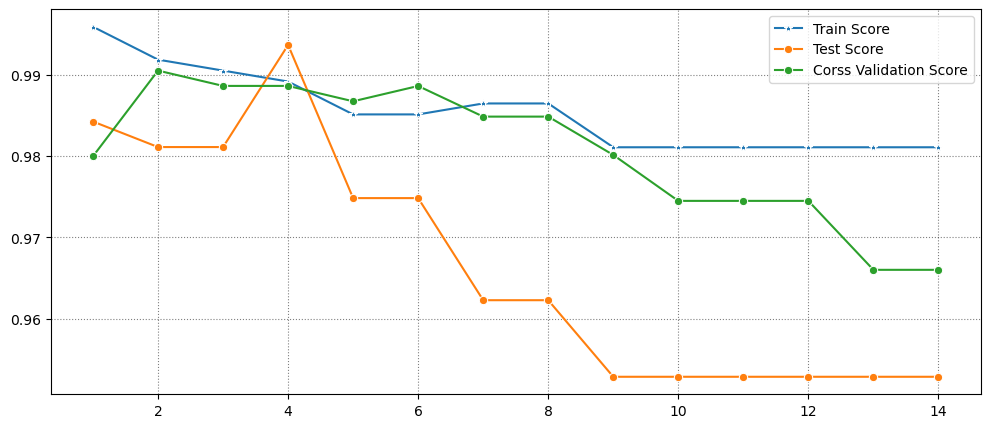

In [21]:
#k-fold cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

knn_validation_scores = []
knn_validation_scores.append(0.98)

#create a new KNN model
for k in range(2,15):
    knn_cv = KNeighborsClassifier(n_neighbors=k)

    #train model with cv of 3 
    knn_cv_scores = cross_val_score(knn_cv, X, y, cv=5)
    #print each cv score (accuracy) and average them
    #print(cv_scores)
    #print("cv_scores mean:{}, k={}".format(np.mean(cv_scores),k))
    knn_validation_scores.append(np.mean(knn_cv_scores))
    #print()

knn_max_validation_score = max(knn_validation_scores)
knn_validation_scores_ind = [i for i, v in enumerate(knn_validation_scores) if v == knn_max_validation_score]
print('Max KNN cross validation score {}% and k(n_neighbors) = {}'.format(knn_max_validation_score*100, list(map(lambda x: x+1, knn_validation_scores_ind))))

plt.figure(figsize=(12,5))
plt.grid(color='black', linestyle=':', alpha=0.5)
p = sns.lineplot(range(1,15),knn_train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),knn_test_scores,marker='o',label='Test Score')
p = sns.lineplot(range(1,15),knn_validation_scores,marker='o',label='Corss Validation Score')

KNN_accuracy =  0.9811320754716981

[[ 72   0   4]
 [  1 113   1]
 [  0   0 127]]


Text(50.722222222222214, 0.5, 'Actual label')

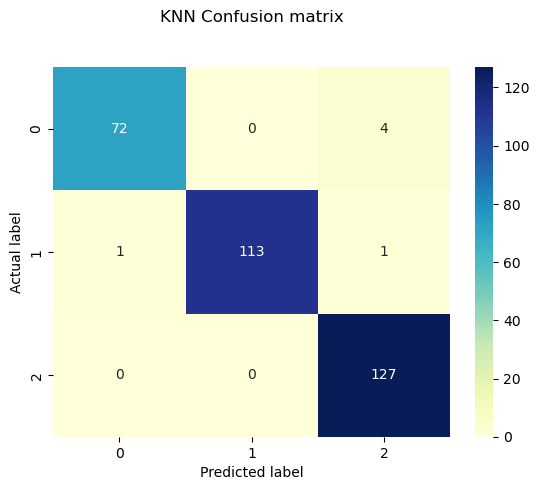

In [22]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) #原先 n_neighbors = 7
  
# accuracy on X_test
knn_accuracy = knn.score(X_test, y_test)
print("KNN_accuracy = ",knn_accuracy)
print()
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
knn_cm = confusion_matrix(y_test, knn_predictions)
print(knn_cm)

p = sns.heatmap(pd.DataFrame(knn_cm), annot=True, cmap="YlGnBu" ,fmt='g') #將矩形資料繪製為彩色編碼矩陣
plt.title('KNN Confusion matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Naive Bayes classifier 
– Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of features in the data. Let (x1, x2, …, xn) be a feature vector and y be the class label corresponding to this feature vector

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

NB_accuracy =  0.8836477987421384

[[ 54   0  22]
 [  5 108   2]
 [  8   0 119]]


Text(50.722222222222214, 0.5, 'Actual label')

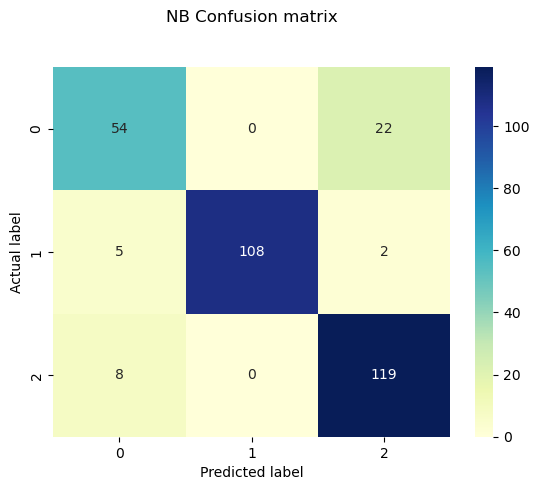

In [23]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
gnb_accuracy = gnb.score(X_test, y_test)
print("NB_accuracy = ",gnb_accuracy)
print()
  
# creating a confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_predictions)
print(gnb_cm)

p = sns.heatmap(pd.DataFrame(gnb_cm), annot=True, cmap="YlGnBu" ,fmt='g') #將矩形資料繪製為彩色編碼矩陣
plt.title('NB Confusion matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# 綜合比較Accuracy

In [24]:
model_name = ["RandomForestClassifier","SVM classifier","KNN classifier","Naive Bayes classifier"]
model_accuracy= [rf_accuracy,svm_accuracy,knn_accuracy,gnb_accuracy]
results=pd.DataFrame({'Model': model_name,'Accuracy': model_accuracy})
display(results)

,Model,Accuracy
0,RandomForestClassifier,0.981132
1,SVM classifier,0.924528
2,KNN classifier,0.981132
3,Naive Bayes classifier,0.883648


# 多分類問題的模型評估指標
https://1fly2sky.wordpress.com/2017/12/21/多分類問題的模型評估指標/

In [25]:
from sklearn.metrics import classification_report
print('RF')
print(classification_report(y_test,rf_predictions))
print()

print('SVM')
print(classification_report(y_test,svm_predictions))
print()

print('KNN')
print(classification_report(y_test,knn_predictions))
print()

print('NB')
print(classification_report(y_test,gnb_predictions))

RF
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       1.00      0.98      0.99       115
           2       0.96      1.00      0.98       127

    accuracy                           0.98       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.98      0.98      0.98       318


SVM
              precision    recall  f1-score   support

           0       0.96      0.71      0.82        76
           1       1.00      0.98      0.99       115
           2       0.85      1.00      0.92       127

    accuracy                           0.92       318
   macro avg       0.94      0.90      0.91       318
weighted avg       0.93      0.92      0.92       318


KNN
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           1       1.00      0.98      0.99       115
           2       0.96      1.00      0.98       127

    acc